# SPT Scheduler

### 필요 라이브러리 import

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd   
%load_ext autoreload
%autoreload 2
import scheduling_lib

### 생산량에 맞도록 job 갯수 선택

In [3]:
# 요일에 따른 파일 선택
ptime_file = 't_500_20_wed.csv'
# 생산량 결정 (job 수) 1 job = 1,000 item
numJobs = 8

### processing time 파일 로딩

In [4]:
ptimes = pd.read_csv(ptime_file, index_col='JobID', nrows=numJobs)
ptimes

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
JobID,,,,,,,,,,,,,,,,,,,,
1,93,58,51,57,42,19,5,76,2,5,6,89,85,20,45,5,55,72,34,16
2,87,48,41,5,18,25,69,57,59,79,68,66,66,53,92,37,10,7,64,65
3,3,39,71,39,90,82,85,12,47,75,59,77,68,5,34,20,38,51,65,78
4,37,97,39,36,33,30,34,50,89,43,42,45,66,85,46,40,81,27,21,99
5,61,43,76,12,78,64,5,79,63,98,60,39,93,63,90,71,52,1,35,87
6,19,34,45,72,50,68,81,86,11,17,60,90,56,39,95,34,93,57,55,79
7,90,24,50,30,16,7,52,95,41,38,12,66,54,25,68,22,72,37,92,97
8,34,78,22,12,15,8,18,63,72,54,82,37,55,98,46,4,23,92,96,84


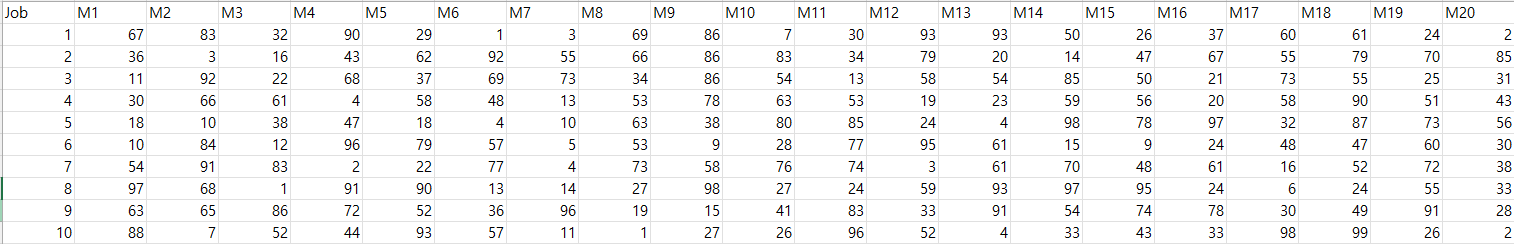

### Job sequencing 수행 (fifo 또는 spt)

In [5]:
# FIFO
job_seq = ptimes.index.values
job_seq

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [6]:
# SPT by M1
job_seq = ptimes.sort_values(by=['M1'], ascending=True).index.values
job_seq

array([3, 6, 8, 4, 5, 2, 7, 1], dtype=int64)

### Schedule 테이블 생성

In [7]:
schedule = scheduling_lib.build_schedule(job_seq, ptimes)
schedule

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M16_in,M16_out,M17_in,M17_out,M18_in,M18_out,M19_in,M19_out,M20_in,M20_out
JobID,,,,,,,,,,,,,,,,,,,,,
3,3,39,71,39,90,82,85,12,47,75,...,786,806,806,844,844,895,895,960,960,1038
6,19,34,45,72,50,68,81,86,11,17,...,959,993,993,1086,1086,1143,1143,1198,1198,1277
8,34,78,22,12,15,8,18,63,72,54,...,1083,1087,1087,1110,1143,1235,1235,1331,1331,1415
4,37,97,39,36,33,30,34,50,89,43,...,1168,1208,1208,1289,1289,1316,1331,1352,1415,1514
5,61,43,76,12,78,64,5,79,63,98,...,1306,1377,1377,1429,1429,1430,1430,1465,1514,1601
2,87,48,41,5,18,25,69,57,59,79,...,1398,1435,1435,1445,1445,1452,1465,1529,1601,1666
7,90,24,50,30,16,7,52,95,41,38,...,1466,1488,1488,1560,1560,1597,1597,1689,1689,1786
1,93,58,51,57,42,19,5,76,2,5,...,1511,1516,1560,1615,1615,1687,1689,1723,1786,1802


### Makespan 출력 및 시각화

In [8]:
# Makespan
makespan = schedule.iloc[-1, -1]
makespan

1802

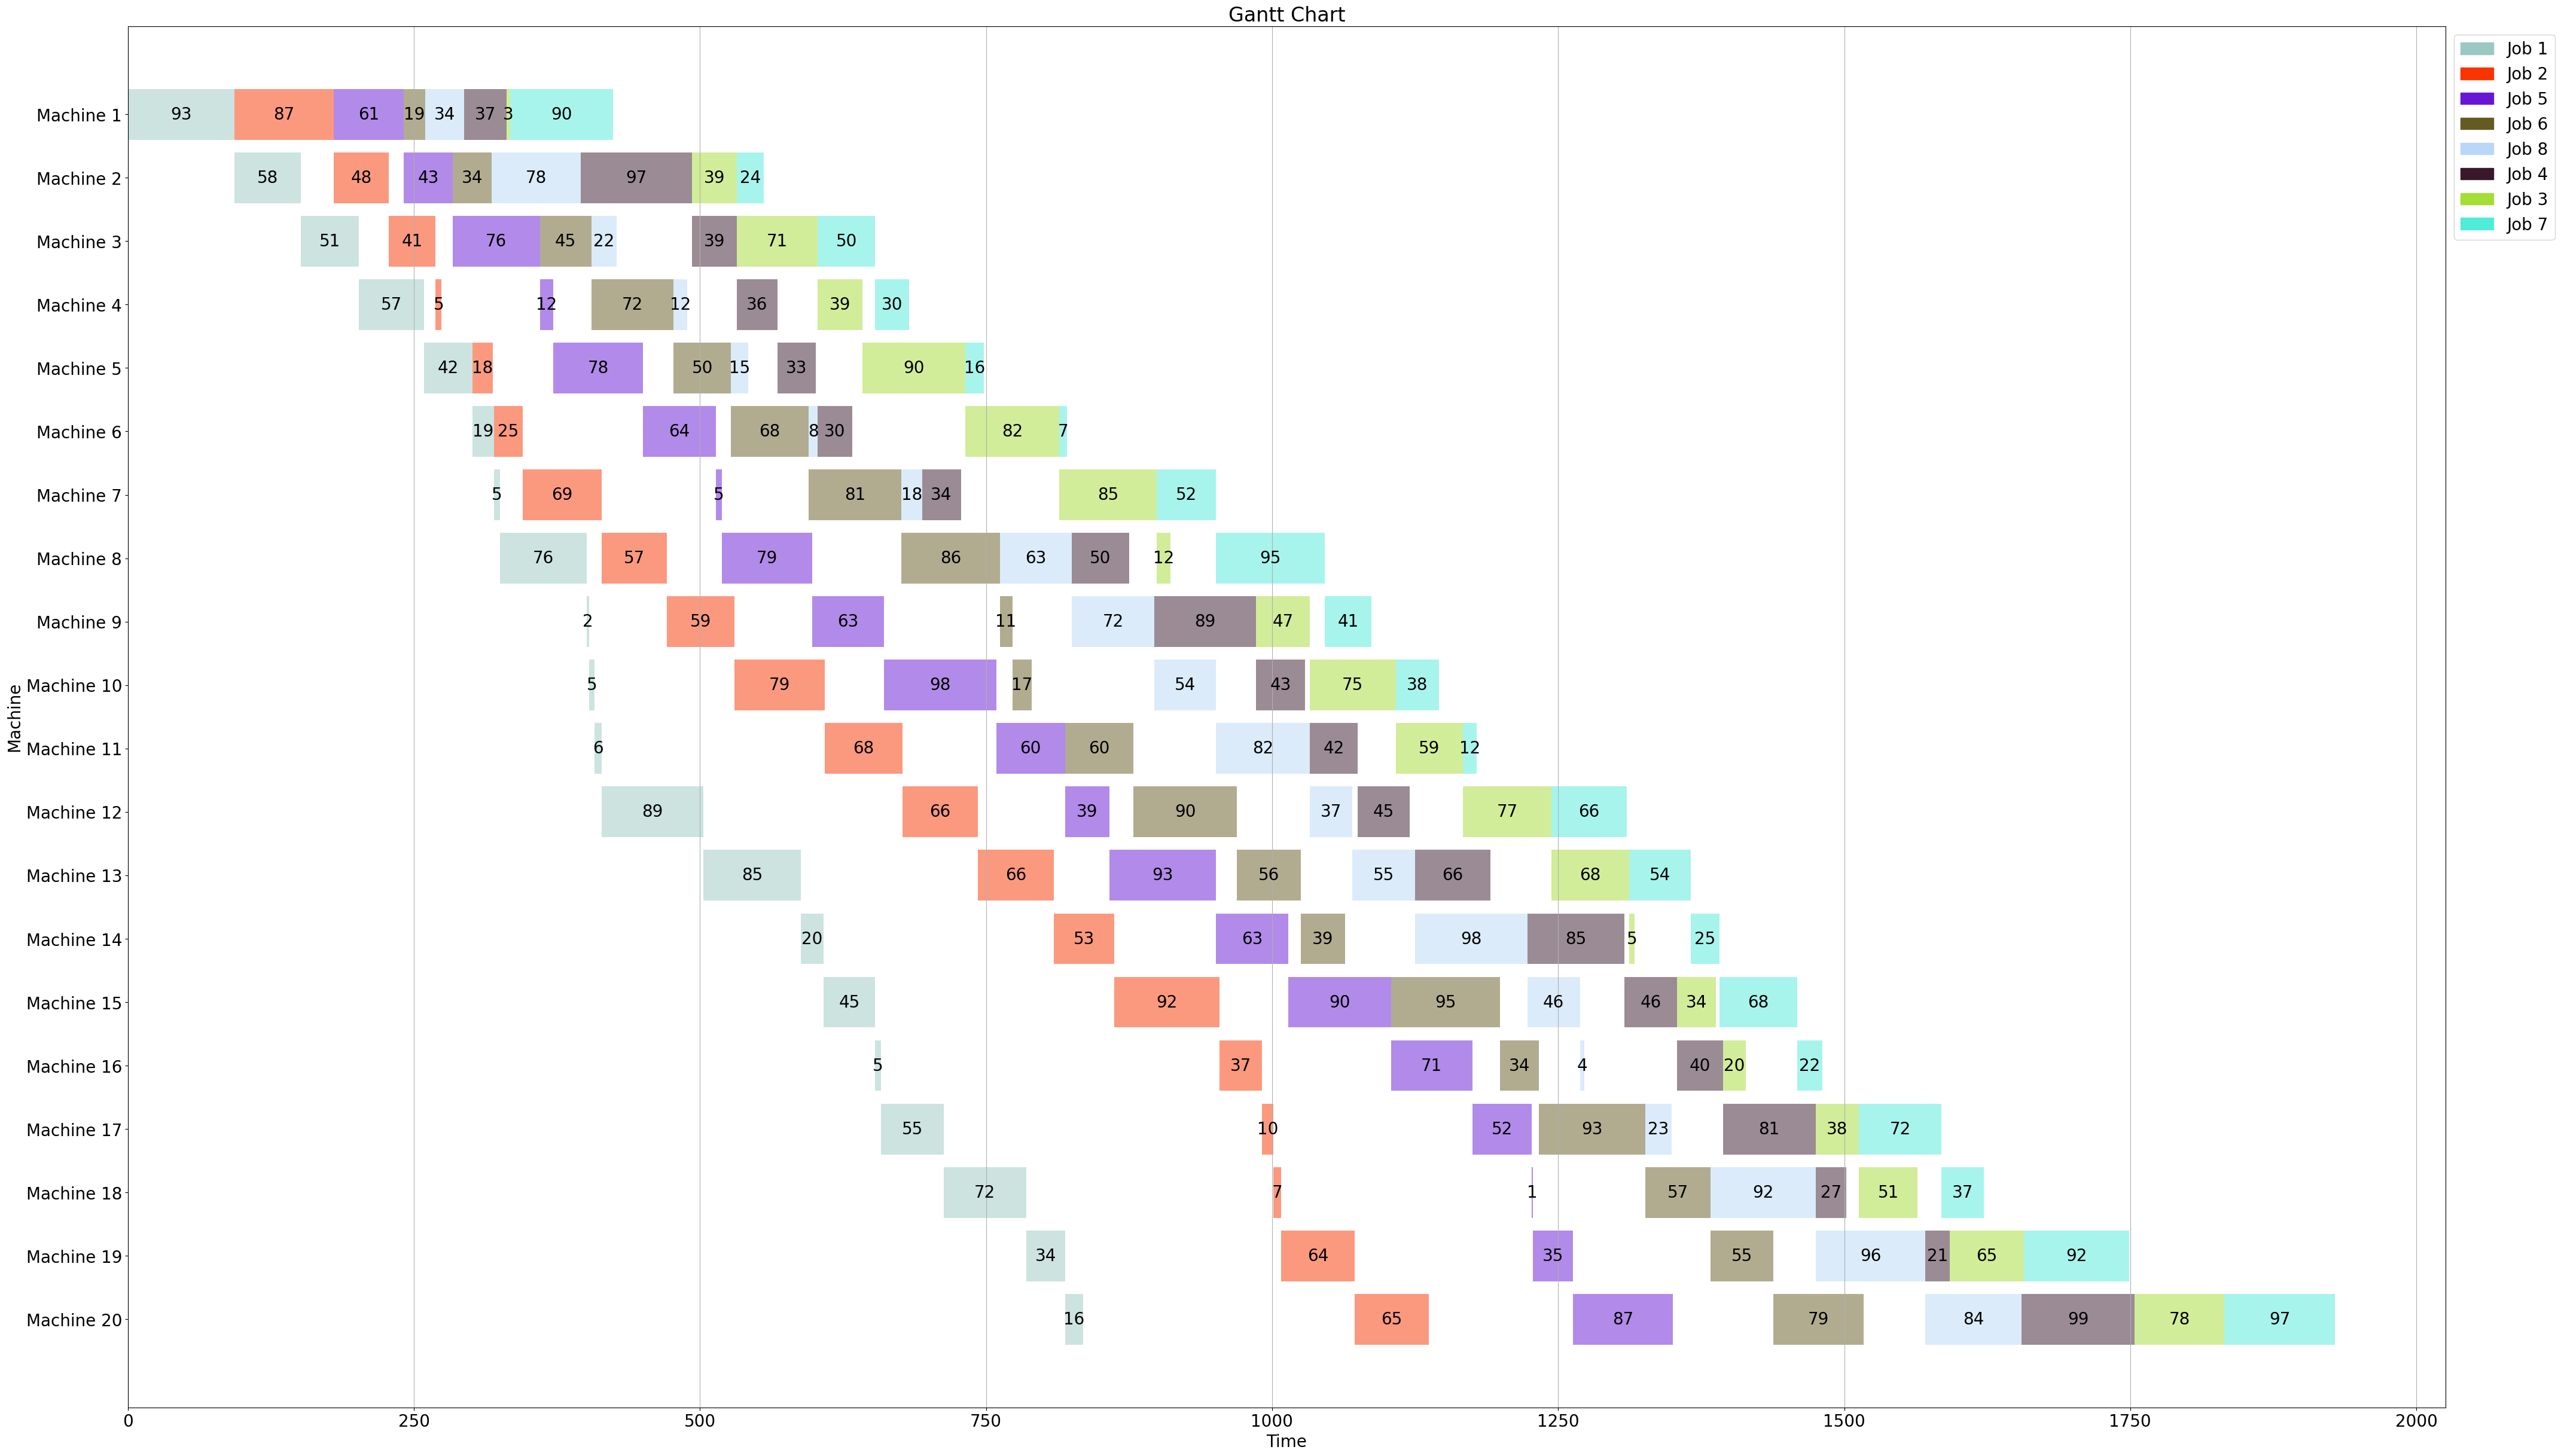

In [12]:
# Ganttchart 생성 및 저장
fig = scheduling_lib.plot_gantt_chart(schedule, figsize=(50,30), fontsize=20, outfile='gantt_chart.png')
# fig.show()
fig.savefig('aaa.png')

### find optimal job sequence

In [10]:
import pandas as pd   
import scheduling_lib

# 요일에 따른 파일 선택
ptime_file = 't_500_20_wed.csv'
# 생산량 결정 (job 수) 1 job = 1,000 item
numJobs = 8

ptimes = pd.read_csv(ptime_file, index_col='JobID', nrows=numJobs)

import itertools

opt_seq = None
opt_makespan = 1000000
print(opt_makespan)
arr = range(1, numJobs+1)
nPr = list(itertools.permutations(arr, numJobs))
for p in range(0, len(nPr)):
    job_seq = nPr[p]
    schedule = scheduling_lib.build_schedule(job_seq, ptimes)
    makespan = schedule.iloc[-1, -1]
    if makespan < opt_makespan:
        opt_seq = job_seq
        opt_makespan = makespan
        print("*"*5, opt_seq, opt_makespan)
    print(p, len(nPr), str(job_seq)+'\t'+ str(makespan))


1000000
***** (1, 2, 3, 4, 5, 6, 7, 8) 1922
0 40320 (1, 2, 3, 4, 5, 6, 7, 8)	1922
1 40320 (1, 2, 3, 4, 5, 6, 8, 7)	1971
2 40320 (1, 2, 3, 4, 5, 7, 6, 8)	1934
***** (1, 2, 3, 4, 5, 7, 8, 6) 1899
3 40320 (1, 2, 3, 4, 5, 7, 8, 6)	1899
4 40320 (1, 2, 3, 4, 5, 8, 6, 7)	1909
5 40320 (1, 2, 3, 4, 5, 8, 7, 6)	1917
6 40320 (1, 2, 3, 4, 6, 5, 7, 8)	1927
7 40320 (1, 2, 3, 4, 6, 5, 8, 7)	1945
8 40320 (1, 2, 3, 4, 6, 7, 5, 8)	1935
***** (1, 2, 3, 4, 6, 7, 8, 5) 1865
9 40320 (1, 2, 3, 4, 6, 7, 8, 5)	1865
10 40320 (1, 2, 3, 4, 6, 8, 5, 7)	1906
11 40320 (1, 2, 3, 4, 6, 8, 7, 5)	1914
12 40320 (1, 2, 3, 4, 7, 5, 6, 8)	1953
13 40320 (1, 2, 3, 4, 7, 5, 8, 6)	1899
14 40320 (1, 2, 3, 4, 7, 6, 5, 8)	1906
15 40320 (1, 2, 3, 4, 7, 6, 8, 5)	1877
16 40320 (1, 2, 3, 4, 7, 8, 5, 6)	1878
***** (1, 2, 3, 4, 7, 8, 6, 5) 1840
17 40320 (1, 2, 3, 4, 7, 8, 6, 5)	1840
18 40320 (1, 2, 3, 4, 8, 5, 6, 7)	1910
19 40320 (1, 2, 3, 4, 8, 5, 7, 6)	1887
20 40320 (1, 2, 3, 4, 8, 6, 5, 7)	1890
21 40320 (1, 2, 3, 4, 8, 6, 7, 5)	1879


KeyboardInterrupt: 